### Analysis pipline for *Why pathway methods work?* project

In [1]:
from subprocess import call
import sys
import pickle as pckl

sys.path.append('../code/')

In [2]:
#getting csv regulons from DoRothEA
call(['Rscript','../code/get_regulon_from_rdata.R'])

0

In [3]:
#getting csv gene sets from msigdb
call(['Rscript','../code/get_msigdb_genesets.R'])

0

In [2]:
import make_genesets

In [5]:
#prepocess dorothea regulons
for confidence in ['A','B','C','D','E','BEST']:
    make_genesets.make_gene_dict_dorothea(confidence)

In [6]:
#prepocess msigdb regulons
for setname in ['BIOCARTA','CGP','KEGG','REACTOME']:
    make_genesets.make_gene_dict_msigdb(setname)

In [7]:
#multi level gene sets for dorothea
make_genesets.make_multi_level_dorothea()

Checking the size of different gene sets.

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [29]:
gene_set_lengths={}
for confidence in ['A','B','C','D','E','AB','ABC','ABCD','ABCDE','BEST']:
    fin=open('../results/genesets/dorothea/dicts/dorothea_%s_set_gene.pkl' % confidence,'br')
    genesets=pckl.load(fin)
    fin.close()
    l=[len(genesets[x]) for x in genesets.keys()]
    gene_set_lengths['DoRothEA_'+confidence]=l
for setname in ['CGP','KEGG','REACTOME','BIOCARTA']:
    fin=open('../results/genesets/msigdb//dicts/%s_set_gene.pkl' % setname,'br')
    genesets=pckl.load(fin)
    fin.close()
    l=[len(genesets[x]) for x in genesets.keys()]
    gene_set_lengths[setname]=l

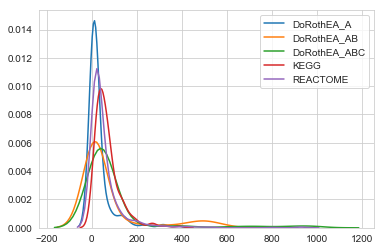

In [31]:
for confidence in ['DoRothEA_A','DoRothEA_AB','DoRothEA_ABC','KEGG','REACTOME']:
    sns.distplot(gene_set_lengths[confidence],hist=False,label=confidence)

Calculating similarities between gene sets: this runs for a long time, so was actually calculated on MTA virtual machines with **code/geneset_similarity.py**.

In [3]:
import os

In [9]:
#make csv files for regulons
fnames=os.listdir('../results/genesets/dorothea/dicts/')
fnames=[x for x in fnames if 'set_gene' in x]
for fname in fnames:
    make_genesets.make_csv_geneset('dorothea',fname[:-4])

In [12]:
fnames=os.listdir('../results/genesets/msigdb/dicts/')
fnames=[x for x in fnames if 'set_gene' in x]
for fname in fnames:
    make_genesets.make_csv_geneset('msigdb',fname[:-4])

In [14]:
#make rdata file from them for viper
call(['Rscript','../code/make_viper_regulon.R'])

0